#Desafio Aevo
##Nossa proposta é que você extraia palavras chaves (tags) ou categorias (escolha apenas uma) de uma base de dados, utilizando alguma técnica de processamento de linguagem natural, e as apresente, tornando simples a visualização dos dados. Utilize a linguagem Python, suas bibliotecas e frameworks para resolução do problema.


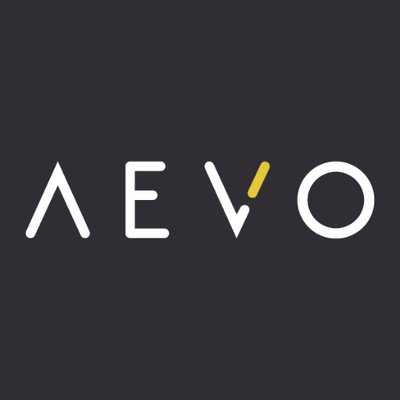

#Aquisição de Dados.


In [1]:
#Para explorar inicialmente o Data Set escolhido para a análise, optei por utilizar duas Bibliotecas.
import numpy as np
import pandas as pd

#Como o arquivo fonte pode ser acessado de um repositório do Github utilisarei uma Snippet do próprio Collab para importar o arquivo
!curl --remote-name \
-H 'Accept: application/vnd.github.v3.raw' \
--location https://raw.githubusercontent.com/minerandodados/mdrepo/master/Tweets_Mg.csv

#Para analisar o arquivo irei guardar o mesmo dentro de uma variável que irei chamar de df
df = pd.read_csv('/content/Tweets_Mg.csv')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1802k  100 1802k    0     0  3276k      0 --:--:-- --:--:-- --:--:-- 3270k


#Visualização de Dados.
 
Para visualizar um exemplo das Colunas e Linhas contidas no arquivo, vou usar a função Head. A intenção é identificar quais dados podem ser utilizados e serão uteis para o objetivo do desafio. Além de exibir o tamanho do DataFrame. 

In [2]:
df.head

<bound method NDFrame.head of       Unnamed: 0                      Created At  ... Unnamed: 23  Unnamed: 24
0              0  Sun Jan 08 01:22:05 +0000 2017  ...         NaN          NaN
1              1  Sun Jan 08 01:49:01 +0000 2017  ...         NaN          NaN
2              2  Sun Jan 08 01:01:46 +0000 2017  ...         NaN          NaN
3              3  Wed Jan 04 21:43:51 +0000 2017  ...         NaN          NaN
4              4  Mon Jan 09 15:08:21 +0000 2017  ...         NaN          NaN
...          ...                             ...  ...         ...          ...
8194        8194  Thu Feb 09 11:48:07 +0000 2017  ...         NaN          NaN
8195        8195  Thu Feb 09 12:10:19 +0000 2017  ...         NaN          NaN
8196        8196  Thu Feb 09 12:04:17 +0000 2017  ...         NaN          NaN
8197        8197  Thu Feb 09 12:10:04 +0000 2017  ...         NaN          NaN
8198        8198  Tue Feb 07 15:01:30 +0000 2017  ...         NaN          NaN

[8199 rows x 26 colum

#Pré-processamento e Processamento dos dados.

Para ter os nomes das colunas de forma mais acessivel, vou usar a função list.

In [3]:
list(df.columns)

['Unnamed: 0',
 'Created At',
 'Text',
 'Geo Coordinates.latitude',
 'Geo Coordinates.longitude',
 'User Location',
 'Username',
 'User Screen Name',
 'Retweet Count',
 'Classificacao',
 'Observação',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24']

Ao utilizar a função Dropna, será possível retirar da base de dados as colunas que possuem informações ausentes, ou NA. Como o objetivo é criar uma base de Tags ou Keywords, essa nova visualização irá tornar possível escolher quais dados são de fato relevantes.

In [4]:
df.dropna(axis=1, how='any',inplace=True)
df.head()

,Unnamed: 0,Created At,Text,Username,User Screen Name,Retweet Count,Classificacao
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",Wândell,klefnews,0,Neutro
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",Wândell,klefnews,0,Neutro
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,Ana estudando,estudandoconcur,0,Neutro
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,Emily,Milly777,0,Negativo


Para que seja possível utilizar os dados de maneira mais lógica irei alterar os nomes da coluna Text pra Tweet e da coluna User Screen Name para Screenname. 
Além disso vamos selecionar  3 colunas para trabalhar nessa análise. Que serão as colunas Tweet, Screenname e Classificação.

In [5]:
df.rename(columns={'Text':'Tweet', 'User Screen Name':'Screenname'}, inplace=True)
df.head()

,Unnamed: 0,Created At,Tweet,Username,Screenname,Retweet Count,Classificacao
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,Leonardo C Schneider,LeoCSchneider,0,Neutro
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",Wândell,klefnews,0,Neutro
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",Wândell,klefnews,0,Neutro
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,Ana estudando,estudandoconcur,0,Neutro
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,Emily,Milly777,0,Negativo


Para avaliar o tamanho dos Tweets irei criar uma nova coluna chamada Lentweet

In [6]:
df['Lentweet'] = df['Tweet'].astype(str).map(len)
df.head()


,Unnamed: 0,Created At,Tweet,Username,Screenname,Retweet Count,Classificacao,Lentweet
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,Leonardo C Schneider,LeoCSchneider,0,Neutro,82
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",Wândell,klefnews,0,Neutro,62
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",Wândell,klefnews,0,Neutro,63
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,Ana estudando,estudandoconcur,0,Neutro,27
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,Emily,Milly777,0,Negativo,126


Mais uma vez vou retirar as colunas que não serão utilizadas na análise

In [7]:
df.drop(['Unnamed: 0','Created At','Username','Retweet Count'],axis=1,inplace=True)

Desse modo temos nosso df com 4 colunas e 8199 linhas.
Será esse o objeto da nossa análise.

In [8]:
list(df.columns)

['Tweet', 'Screenname', 'Classificacao', 'Lentweet']

A coluna Lentweet foi criada para avaliar o tamanho dos dados para a análise futura, desse modo vamos verificar utilizando os seguintes códigos.

In [9]:
len(df.Lentweet)

8199

In [10]:
total_lentweet = df['Lentweet'].sum()
avg_tweetlen = total_lentweet/8199

In [11]:
print('O total de caracteres na colunas Tweets é de:',total_lentweet)
print('A média de caracteres por Tweet é de:',avg_tweetlen)

O total de caracteres na colunas Tweets é de: 954878
A média de caracteres por Tweet é de: 116.46273935845835


Tendo em vista a quantidade de dados, se faz necessário dividir os dados, utilizarei a coluna Classificação para isso.

In [12]:
grupo = df.groupby('Classificacao')
grupo.count()

,Tweet,Screenname,Lentweet
Classificacao,,,
Negativo,2446,2446,2446
Neutro,2453,2453,2453
Positivo,3300,3300,3300


Será escolhida o grupo de Tweets Positivos objeto de primeira análise e início de fase de  Pré-processamento de Dados.

In [13]:
df_pos = df.loc[df['Classificacao'] == 'Positivo']
df_pos.head(10)


,Tweet,Screenname,Classificacao,Lentweet
65,"#DefesaAgropecuária ""Governo de Minas Gerais a...",inovadefesa,Positivo,118
66,#EBC Governo de Minas investiga casos suspeito...,TaNaBoa,Positivo,108
87,#Minas vai dobrar oferta de trabalho e estudo ...,em_com,Positivo,94
88,#Minas vai dobrar oferta de trabalho e estudo ...,portaluai,Positivo,94
108,#SUS Minas Gerais recebe recurso máximo dispon...,SaudeMG,Positivo,136
163,"@diegocabral75 @exame aí em MG, ta td bem? Pim...",marcos_vxs,Positivo,139
199,@israel_massa @ferrisss @JornalOGlobo pelo men...,MarcosMargon,Positivo,139
225,"@madeleinelacsko Em MG e SP,o Estado tem razoá...",dariojjunior,Positivo,140
226,@Madonegatti MG melhor estado,burn_maria,Positivo,29
244,@MrSincero_ @klyfor @MBLivre @MBLivreBH Minas ...,nathalia_qga,Positivo,140


Para realizar o pré-processamento irei usar as bibliotecas RE e Nltk. Utilizei como fonte o trabalho de Sujan Dutta, e pode ser encontrado nesse link: https://github.com/Suji04/NormalizedNerd/blob/master/Introduction%20to%20NLP/Text%20Cleaning%20%2B%20Preprocessing.ipynb

In [14]:

import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Vou utilizar uma abordagem de avaliação linha a linha. A intenção é criar uma função que possa ser replicada nos outros Data Frames. Será chamada, limpar_tweets.

In [15]:
def limpar_tweets(df):
  #Criar uma variável para armazenar uma lista que será criada.
  tweets_lim = list()
  #E uma segunda variável que irá se utilizada para acessar cada linha.
  linhas = df['Tweet'].values.tolist()
  #Para automatizar a busca linha a linha, uso a função 'for'
  for text in linhas:
    #Diminuir todo o texto para caixa-baixa
    text = text.lower()
    #Limpar do texto urls
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    #Retirada de Emojis e Simbolos, tendo em vista que não podem ser avaliados como Tags, ou Palavras-chave
    emoji = re.compile("["
                        u"\U0001F600-\U0001FFFF"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00002702-\U000027B0"
                        u"\U000024C2-\U0001F251"
                        "]+", flags=re.UNICODE)
    text = emoji.sub(r'', text)
    #Retirada de pontuações
    text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    #realizar a tokenização e serparação de texto em palavras
    tokens = word_tokenize(text, language='portuguese')
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    #Descartando oque não pode ser reconhecido como alfabeto
    words = [word for word in stripped if word.isalpha()]
    #Criando variável que ira agregar todas as palavras irrelevantes.
    stop_words = set(stopwords.words("portuguese"))
    stop_words.add('rt')
    words = [w for w in words if not w in stop_words]
    words = ' '.join(words)
    #Adicionando as palavras, 'limpas' a lista criada no inicio.
    tweets_lim.append(words)
  return tweets_lim



Com isso posso executar a função no df_pos

In [16]:
tweets_pos = limpar_tweets(df_pos)

Podemos comparar como era e como ficou o texto

In [17]:
print('O Tweet limpo ficou assim:',
      tweets_pos[0])

O Tweet limpo ficou assim: defesaagropecuária governo minas gerais aposta arranjos produtivos locais ritda


In [18]:
print('O Tweet era assim:',
      df.Tweet[65])

O Tweet era assim: #DefesaAgropecuária "Governo de Minas Gerais aposta nos Arranjos Produtivos Locais" na #RITDA: https://t.co/FzwaAJbcsw


Acredito ser importante verificar se não perdemos nenhuma linha no processamento.

In [19]:
df2 = pd.DataFrame(tweets_pos)
df2.columns = ['Tweets_limpos']

In [20]:
df2.dropna()

,Tweets_limpos
0,defesaagropecuária governo minas gerais aposta...
1,ebc governo minas investiga casos suspeitos fe...
2,minas vai dobrar oferta trabalho estudo presíd...
3,minas vai dobrar oferta trabalho estudo presíd...
4,sus minas gerais recebe recurso máximo disponi...
...,...
3295,trio preso suspeito roubo tráfico abuso sexual...
3296,trio preso suspeito roubo tráfico abuso sexual...
3297,trio preso suspeito roubo tráfico abuso sexual...
3298,trio preso suspeito roubo tráfico abuso sexual...


Ao criar o df2 e executar a função dropna verificamos que mantemos a quantidade de linhas original. 3300 linhas.

Foi possível visualizar repetição de linhas com o mesmo conteúdo, para economizar recurso no processamento dos dados, e ter uma contagem de Palavras-chave sem o peso da repetição, iriei retirar as linhas com conteúdo repetido. 

In [21]:
tweets_unicos_pos = list(set(tweets_pos))
len(tweets_unicos_pos)

1384

Temos agora uma lista, com 1384 linhas. Uma grande redução no dataframe.

#Modelagem dos Dados

Para modelagem dos dados, vou utilizar a biblioteca Gensim, tive como fonte e conheci a bibllioteca através do trabalho do Sujan Dutta, e deixo o link de referência. https://github.com/Suji04/NormalizedNerd/blob/master/Introduction%20to%20NLP/Summarization%20%26%20Keyword%20Extraction.ipynb

Para utilizar essa biblioteca o seu método, é necessário transformar nossa lista em um texto.

In [22]:
texto_final_pos = " ".join(s for s in tweets_unicos_pos)


Desse modo nossa lista agora é um texto espaçado com 1 espaço em branco entre as linhas ' '. 

In [23]:
texto_final_pos[0:1000]

'secretaria educação formiga abre novo processo seletivo timbeta betim militares bpe aborda dois suspeitos apreendem drogas pm apreende pés maconha drogas uberlândia somostodosdilma raynniere buyraynniereonitunes polícia militar prende rapaz tráfico drogas bairro cristóvão mariana mg new post quatro homens presos tráfico drogas janaúba dois jovens presos suspeitos roubo montes claros uso rádio ferramenta pedagógicaconfira new post polícia civil apreende drogas materiais refino iturama new post operação pm prende sete pessoas tráfico drogas mantena processo designação professores estaduais minas feito internet new post polícia prende nove suspeitos tráfico drogas ipatinga presídio construído brasil sistema públicoprivadaem anosnunca motimrebelião morte emcom minas vai dobrar oferta trabalho estudo presídios estado novos radares começaram funcionar contribuindo segurança viária rodovias quatro homens presos suspeitos tráfico drogas pirapora jovem preso patos minas suspeito tráfico roubo 

In [24]:
from gensim.summarization import keywords

Utilizando esse método, podemos definir a quantidade de palavras, solicitei que fosse informado o Score, de cada palavra, de acordo com sua presença no texto. 


In [25]:
tags_pos = keywords(texto_final_pos, scores=True)

In [26]:
tags_pos[0:10]


[('mina', 0.36805191295002626),
 ('policias', 0.2006918154901243),
 ('roubos', 0.1950952700865479),
 ('gerais', 0.16236591663483702),
 ('estados', 0.152492220774616),
 ('dois suspeitos apreendem drogas', 0.13629237533358252),
 ('operacaobetalab', 0.12937198388261542),
 ('presidio', 0.1269712513558161),
 ('designacao professores estaduais minas', 0.1183251020506666),
 ('presidios estado novos', 0.1160447386136783)]

Existe uma possibilidade de utilizar o argumento lemmatize, desse modo as palavras com a mesma raiz, serão desconsideradas. Vou usar essa opção.

In [27]:
tags_pos = keywords(texto_final_pos, scores=True, lemmatize=True)

In [28]:
tags_pos[0:10]

[('mina', 0.36805191295002615),
 ('policias', 0.20069181549012455),
 ('apreendem drogas', 0.1973724084731734),
 ('roubos', 0.19509527008654778),
 ('gerais', 0.1623659166348368),
 ('estados', 0.1524922207746159),
 ('operacaobetalab', 0.12937198388261545),
 ('presidios', 0.12697125135581605),
 ('news', 0.1015253637095173),
 ('tres', 0.09936677860529469)]

In [29]:
df3 = pd.DataFrame(tags_pos)
df3.columns = ['twetlimpo','score']
df3.head()

,twetlimpo,score
0,mina,0.368052
1,policias,0.200692
2,apreendem drogas,0.197372
3,roubos,0.195095
4,gerais,0.162366


#Apresentação dos Resultados

Para apresentar os resultados obtidos usarei o método criado por Duong Vu, disponível em https://www.datacamp.com/community/tutorials/wordcloud-python

In [30]:
!pip install wordcloud -q
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.image as mpimg
from matplotlib import rcParams

O método WordCloud consegue utiliza uma String para gerar a nuvem de palavras, por esse motivo vou criar um texto com as palavras obtidas.

Seria possível usar a váriavel texto_final_pos, entretanto o resultado seria diferente como vou mostrar mais a frente.


In [31]:
text_pos = " ".join(y for y in df3.twetlimpo)

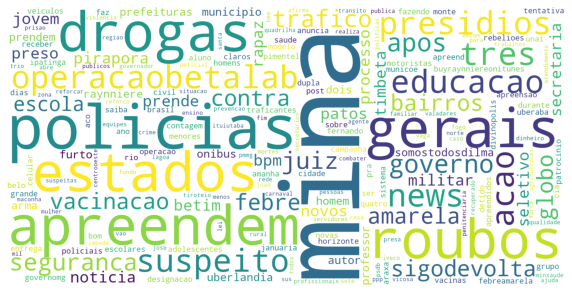

In [32]:
wordcloud = WordCloud (background_color='white',
                      width=1600, height=800).generate(text_pos)



fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file('wc_text_pos.png')

O método WordCloud obedeceu o peso das váriaveis dadas e destacou por ordem de tamanho as palavras com maior Score. 

Utilizando o mesmo método com outra fonte de dados, texto_final_pos, temos outro resultado.

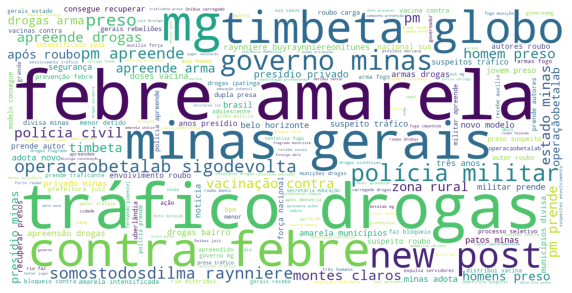

In [33]:
wordcloud = WordCloud (background_color='white',
                      width=1600, height=800).generate(texto_final_pos)



fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file('wc_texto_final_pos.png')

Interessante verificar que desse modo, foram mantidos conjunto de palavras, diferente do tratamento executado pelo Gensim.

Esse método de apresentação pode ser realizado usando uma máscara, dando um dinamismo a imagem. Escolhi o mapa de Minas Gerais como exemplo, devido as menções ao estado e algumas de suas cidades.

In [34]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/EricRaniere/Desafio_Aevo/main/mg_mask.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9586  100  9586    0     0  45216      0 --:--:-- --:--:-- --:--:-- 45216


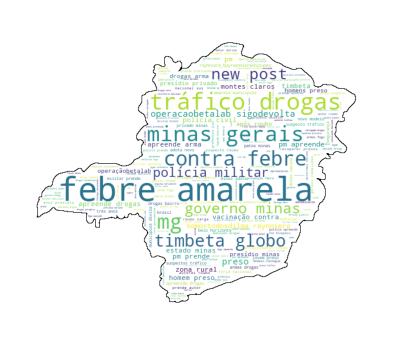

In [35]:
mg_mask = np.array(Image.open("/content/mg_mask.png"))

wordcloud = WordCloud(mask=mg_mask, contour_width=1, background_color='white',
                      max_font_size=300, min_font_size=0.5, ).generate(texto_final_pos)

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file('wc_texto_final_posmg.png')

Como forma de comparação vou gerar o WordCloud das classificações Negativas e Neutras.

Gerando as imagens de classificação Neutras

In [36]:
df_neu = df.loc[df['Classificacao'] == 'Neutro']
tweets_neu = limpar_tweets(df_neu)
tweets_unicos_neu = list(set(tweets_neu))
texto_final_neu = " ".join(s for s in tweets_unicos_neu)

wordcloud0 = WordCloud (background_color='white',
                      width=1600, height=800).generate(texto_final_neu)
wordcloud0.to_file('wc_texto_final_neu1.png')

wordcloud1 = WordCloud(mask=mg_mask, contour_width=1, background_color='white',
                      max_font_size=300, min_font_size=0.5, ).generate(texto_final_neu)
wordcloud1.to_file('wc_texto_final_neumg1.png')

Gerando as imagens de classificação Negativas

In [37]:
df_neg = df.loc[df['Classificacao'] == 'Negativo']
tweets_neg = limpar_tweets(df_neg)
tweets_unicos_neg = list(set(tweets_neg))
texto_final_neg = " ".join(s for s in tweets_unicos_neg)

wordcloud2 = WordCloud (background_color='white',
                      width=1600, height=800).generate(texto_final_neg)
wordcloud2.to_file('wc_texto_final_neg1.png')

wordcloud3 = WordCloud(mask=mg_mask, contour_width=1, background_color='white',
                      max_font_size=300, min_font_size=0.5, ).generate(texto_final_neg)

wordcloud3.to_file('wc_texto_final_negmg1.png')

Instalando Biblioteca para gerar imagens lado a lado para comparação

In [38]:
!pip install ipyplot
import ipyplot


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `base_64` param to `True`.
        


Gerando imagens lado a lado com o Mapa de Minas Gerais


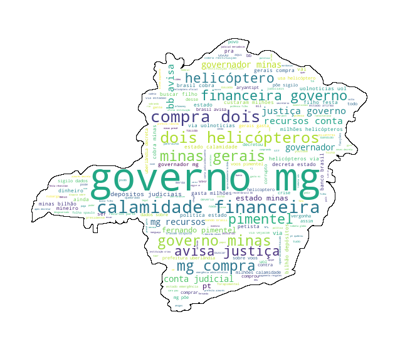
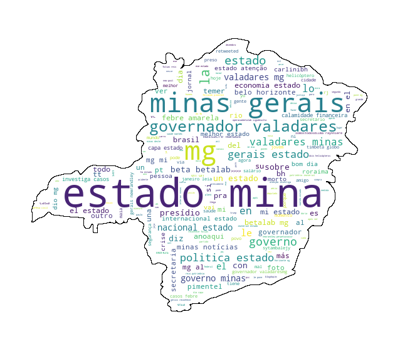
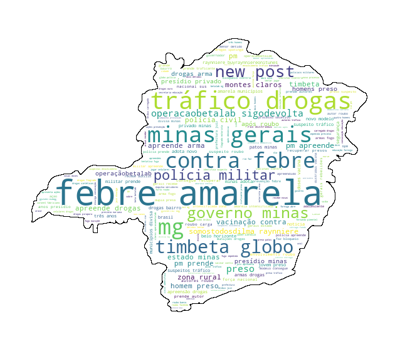


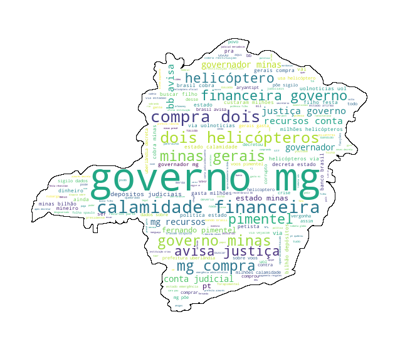
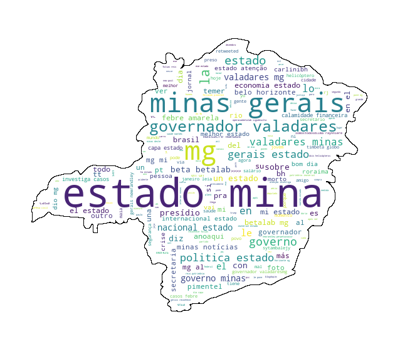
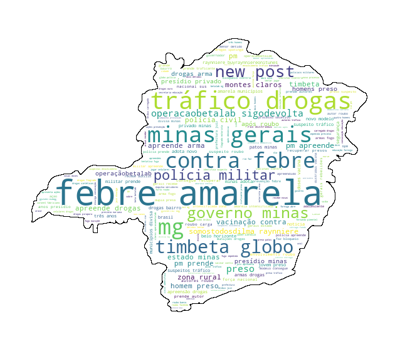

In [39]:
# ler imagens
img_A = mpimg.imread('/content/wc_texto_final_negmg1.png')
img_B = mpimg.imread('/content/wc_texto_final_neumg1.png')
img_C = mpimg.imread('/content/wc_texto_final_posmg.png')
# lista de imagens
imagens_mapa = [img_A, img_B, img_C]
# Mostrar imagens lado a lado
ipyplot.plot_images(imagens_mapa, max_images=3, img_width=400, labels= ('Negativo', 'Neutro','Positivo'))

Gerando imagens lado a lado com o nuvem de tags.


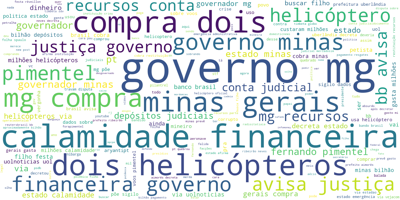
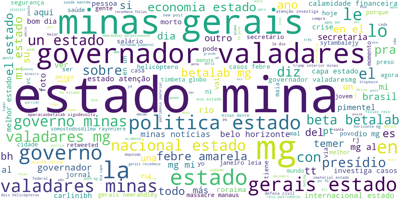
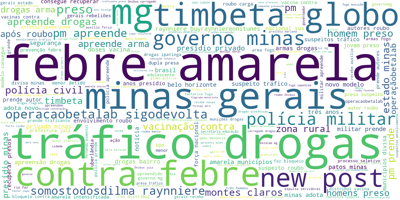


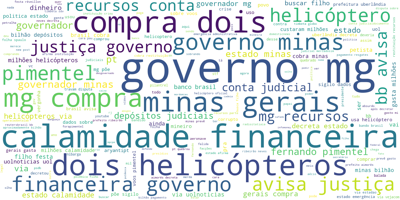
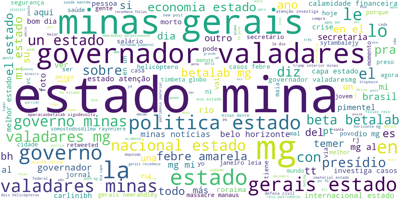
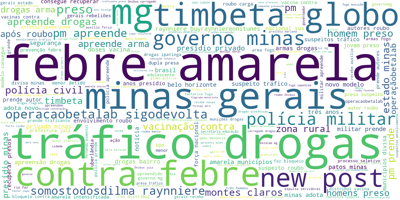

In [40]:
# ler imagens
img_A1 = mpimg.imread('/content/wc_texto_final_neg1.png')
img_B1 = mpimg.imread('/content/wc_texto_final_neu1.png')
img_C1 = mpimg.imread('/content/wc_texto_final_pos.png')
# lista de imagens
imagens_wc= [img_A1, img_B1, img_C1]
#Mostrar imagens lado a lado
ipyplot.plot_images(imagens_wc, max_images=3, img_width=400, labels= ('Negativo', 'Neutro','Positivo'))

#Conclusão
As imagens geradas representam um tipo de apresentação possível, o meu objetivo pessoal nesse desafio era o de de cumprir os requisitos mesmo sem ter o total domínio das ferramentas. Acredito que tenha sido bem sucedido nessa empreita.

Há ainda alguns ajustes que vou buscar fazer ao longo do tempo, acredito que os códigos podem ser melhor escritos e não estou plenamente satisfeito com a execução do filtro, acredito que a base de dados influênciou diretamente no resultado. Por ser mais complexa que um texto exigiu mais busca de conhecimento para se chegar ao resultado, e causou diferentes resultados no meio do caminho.



Usando as técnicas do desafio, é possível limpar outros textos e extrair palavras chave, abaixo utilizei um texto do blog da Aevo sobre Inovação como exemplo.

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8964  100  8964    0     0  59760      0 --:--:-- --:--:-- --:--:-- 59760



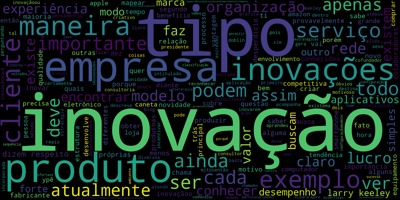
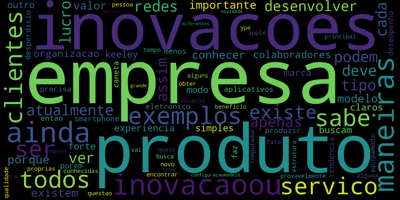


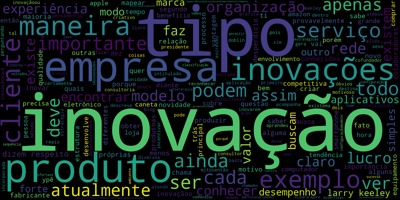
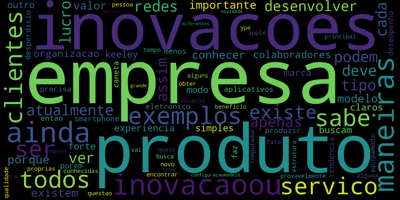

In [78]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/EricRaniere/Desafio_Aevo/main/inovacaoaevo.txt

with open('inovacaoaevo.txt', 'r', encoding="utf8") as file:
    textaevo = file.read().replace('\n', '')

dfaevo = pd.DataFrame([textaevo])
dfaevo.columns = ["Tweet"]
cleaned_text = limpar_tweets(dfaevo)

text_aevo1 = " ".join(y for y in cleaned_text)

pc_gensim_aevo = keywords(text_aevo1, lemmatize=True)

wordcloud4 = WordCloud (width=1600, height=800).generate(text_aevo1)
wordcloud4.to_file('wc_texto_aevo.png')

wordcloud5 = WordCloud (width=1600, height=800).generate(pc_gensim_aevo)
wordcloud5.to_file('wc_texto_aevo2.png')

# ler imagens
img_A2 = mpimg.imread('/content/wc_texto_aevo.png')
img_B2 = mpimg.imread('/content/wc_texto_aevo2.png')
# lista de imagens
imagens_wc= [img_A2, img_B2]
#Mostrar imagens lado a lado
ipyplot.plot_images(imagens_wc, max_images=2, img_width=400, labels= ('Limpar_tweets', 'Gensim'))